C:\Users\user\AppData\Local\Temp\ipykernel_17192\4021947328.py:56: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)



📌 Logistic Regression
              precision    recall  f1-score   support

           0       0.52      0.44      0.47      3430
           1       0.53      0.61      0.57      3601

    accuracy                           0.53      7031
   macro avg       0.53      0.52      0.52      7031
weighted avg       0.53      0.53      0.52      7031

Confusion Matrix:
 [[1497 1933]
 [1395 2206]]


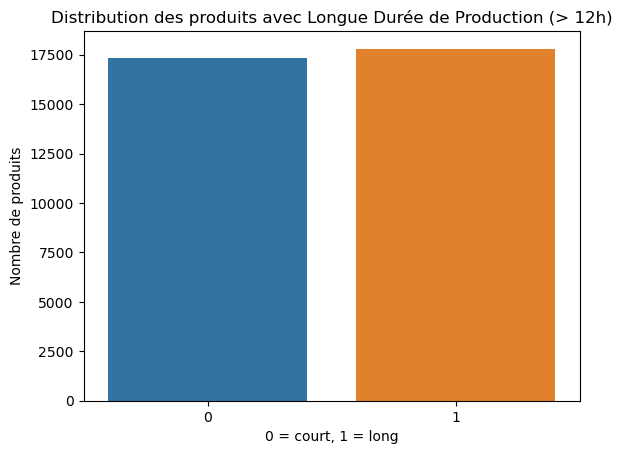

In [15]:
# 🛠️ Classification supervisée : Prédire si un produit a une longue durée de production (plus de 12h)

import pandas as pd
import pyodbc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Connexion SQL Server
conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=DESKTOP-H2KFI66\FA;'
    'DATABASE=fffffffff;'
    'Trusted_Connection=yes;'
)

# Requête SQL (uniquement les productions > 0h)
query = '''
SELECT 
    fp.Product_PK,
    DATEDIFF(HOUR, d_start.Full_Date, d_end.Full_Date) AS ProductionDuration,
    b.brandname AS Brand,
    cat.Category AS Category,
    d_start.Year,
    d_start.Month,
    (
        SELECT COUNT(*) 
        FROM Fact_Dosage fd 
        WHERE fd.Prod_FK = fp.Product_PK
    ) AS NbMaterials

FROM 
    Fact_Production fp
JOIN 
    Dim_Product p ON p.Product_PK = fp.Product_PK
JOIN 
    Dim_Brand b ON b.Brand_PK = p.Brand_FK
JOIN 
    Dim_Category cat ON cat.Category_PK = p.Category_FK
JOIN 
    Dim_Date d_start ON d_start.Date_PK = fp.ProductionStartDate_PK
JOIN 
    Dim_Date d_end ON d_end.Date_PK = fp.ProductionEndDate_PK

WHERE 
    fp.ProductionStartDate_PK IS NOT NULL 
    AND fp.ProductionEndDate_PK IS NOT NULL 
    AND DATEDIFF(HOUR, d_start.Full_Date, d_end.Full_Date) > 0
'''

# Chargement et nettoyage
df = pd.read_sql(query, conn)
conn.close()

# Cible binaire : 1 si > 12h, sinon 0
df['LongProduction'] = (df['ProductionDuration'] > 12).astype(int)

# Suppression des colonnes inutiles
X = df.drop(columns=['Product_PK', 'ProductionDuration', 'LongProduction'])
y = df['LongProduction']

# Encodage catégorique
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entraînement Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


# Résultats
print("\n📌 Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))



# Visualisation de la répartition
sns.countplot(x='LongProduction', data=df)
plt.title('Distribution des produits avec Longue Durée de Production (> 12h)')
plt.xlabel('0 = court, 1 = long')
plt.ylabel('Nombre de produits')
plt.show()

In [14]:
produits_courte_duree = df[df['LongProduction'] == 0]
print(produits_courte_duree[['Product_PK', 'ProductionDuration']])


       Product_PK  ProductionDuration
0            1065                   5
1            1065                   5
2            1065                   5
3            1065                   5
4            1065                   5
...           ...                 ...
35131        1137                   9
35132        1137                   9
35133        1137                   9
35134        1137                   9
35135        1137                   9

[17348 rows x 2 columns]



📌 Random Forest
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      3430
           1       0.78      0.77      0.78      3601

    accuracy                           0.77      7031
   macro avg       0.77      0.77      0.77      7031
weighted avg       0.77      0.77      0.77      7031

Confusion Matrix:
 [[2635  795]
 [ 816 2785]]


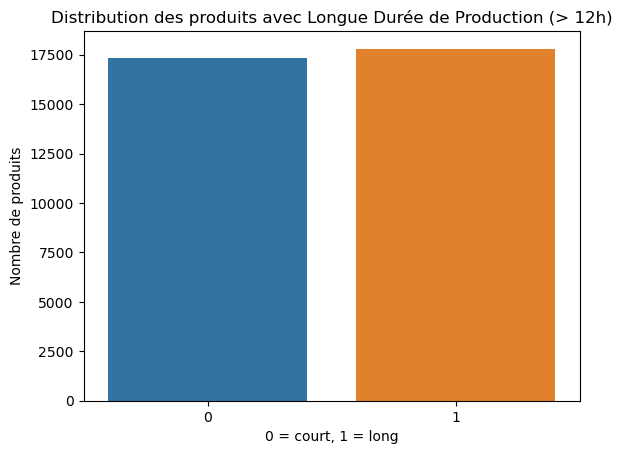

In [17]:
# Entraînement Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


print("\n📌 Random Forest")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Visualisation de la répartition
sns.countplot(x='LongProduction', data=df)
plt.title('Distribution des produits avec Longue Durée de Production (> 12h)')
plt.xlabel('0 = court, 1 = long')
plt.ylabel('Nombre de produits')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_2616\3986166330.py:51: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:35:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🚀 XGBoost Classifier
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      3430
           1       0.76      0.77      0.77      3601

    accuracy                           0.76      7031
   macro avg       0.76      0.76      0.76      7031
weighted avg       0.76      0.76      0.76      7031

Confusion Matrix:
 [[2561  869]
 [ 823 2778]]
Accuracy Score: 0.7593514436068838


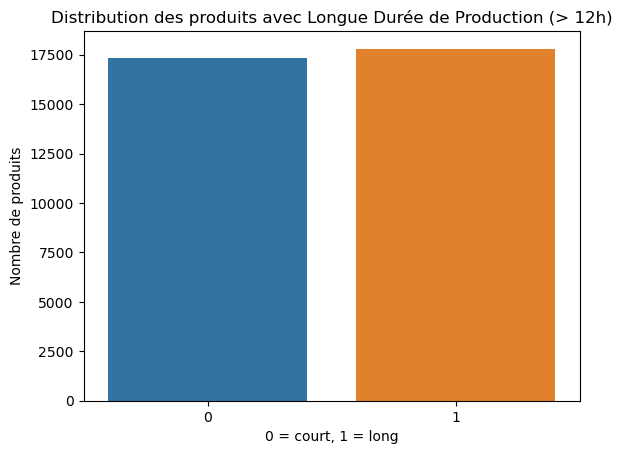

In [1]:
import pandas as pd
import pyodbc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier  # 👉 Nouveau modèle

# Connexion SQL Server
conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=DESKTOP-H2KFI66\FA;'
    'DATABASE=fffffffff;'
    'Trusted_Connection=yes;'
)

# Requête SQL
query = '''
SELECT 
    fp.Product_PK,
    DATEDIFF(HOUR, d_start.Full_Date, d_end.Full_Date) AS ProductionDuration,
    b.brandname AS Brand,
    cat.Category AS Category,
    d_start.Year,
    d_start.Month,
    (
        SELECT COUNT(*) 
        FROM Fact_Dosage fd 
        WHERE fd.Prod_FK = fp.Product_PK
    ) AS NbMaterials
FROM 
    Fact_Production fp
JOIN 
    Dim_Product p ON p.Product_PK = fp.Product_PK
JOIN 
    Dim_Brand b ON b.Brand_PK = p.Brand_FK
JOIN 
    Dim_Category cat ON cat.Category_PK = p.Category_FK
JOIN 
    Dim_Date d_start ON d_start.Date_PK = fp.ProductionStartDate_PK
JOIN 
    Dim_Date d_end ON d_end.Date_PK = fp.ProductionEndDate_PK
WHERE 
    fp.ProductionStartDate_PK IS NOT NULL 
    AND fp.ProductionEndDate_PK IS NOT NULL 
    AND DATEDIFF(HOUR, d_start.Full_Date, d_end.Full_Date) > 0
'''

# Chargement
df = pd.read_sql(query, conn)
conn.close()

# Cible
df['LongProduction'] = (df['ProductionDuration'] > 12).astype(int)

# Features et target
X = df.drop(columns=['Product_PK', 'ProductionDuration', 'LongProduction'])
y = df['LongProduction']

# Encodage
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔥 Entraînement XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# 📊 Résultats
print("\n🚀 XGBoost Classifier")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))

# 📈 Distribution
sns.countplot(x='LongProduction', data=df)
plt.title('Distribution des produits avec Longue Durée de Production (> 12h)')
plt.xlabel('0 = court, 1 = long')
plt.ylabel('Nombre de produits')
plt.show()
